In [1]:
# Standard PyData imports
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import functools
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#import warnings
#warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn import cross_validation as cv
from sklearn import metrics
from sklearn import grid_search as gs
from sklearn import linear_model as glm
from sklearn import ensemble as en
from sklearn import svm

# Custom imports
import transforms as T

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
data = pd.read_csv('Sold_Fleet_Equipment.tsv', sep='\t')
features, target = T.generate_features(data)
filtered_loc = target < 75000
features, target = features.loc[filtered_loc, :], target.loc[filtered_loc]
X, X_test, y, y_test = cv.train_test_split(features.values, target.values)
X_train, X_validation, y_train, y_validation = cv.train_test_split(X, y)

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


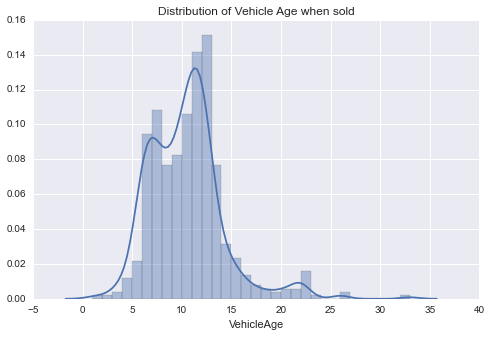

In [13]:
fig = plt.figure(figsize=(8,5))
sns.distplot(features['VehicleAge'])
plt.title('Distribution of Vehicle Age when sold')

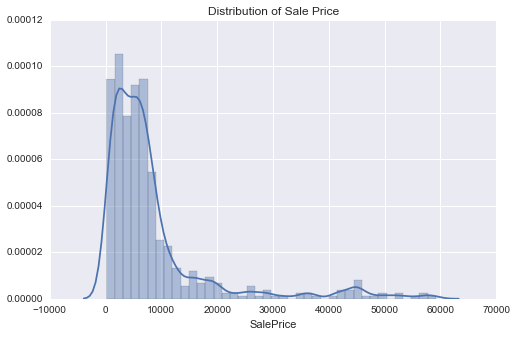

In [14]:
fig = plt.figure(figsize=(8,5))
sns.distplot(target)
plt.title('Distribution of Sale Price')

#Model Selection
After trying a lot of different models, with different parameter settings, it looks like the tree-based regressors performed the best. Almost all of the ensemble regressors, many of the GLMs, and the SVM regressors were tried.

Data with over SalePrice over $75,000 was filtered out due to skewing the model.

In [16]:
def evaluate(models, X, y):
    rmses = [np.sqrt(metrics.mean_squared_error(y, m.predict(X))) for m in models]
    for rmse in rmses:
        print(rmse)

In [17]:
#params = {'C': np.logspace(0.001, 10),
#          'epsilon': np.linspace(0, 1, num=10)}
models = [en.ExtraTreesRegressor(n_estimators=200, n_jobs=-1), 
          en.GradientBoostingRegressor(n_estimators=2000),
          en.RandomForestRegressor(n_estimators=2000)]
models = [m.fit(X_train, y_train) for m in models]

In [18]:
evaluate(models, X_validation, y_validation)

4451.42977019
5081.0906219
4545.62195984


In [19]:
# Retraining the model on more data
best_model = en.RandomForestRegressor(n_estimators=2000)
best_model.fit(X, y)
evaluate([best_model], X_test, y_test)

6578.51319087


# Conclusion
After evaluating the RMSE from the best model found via cross validation, the conclusion is that this model sucks. There does not seem to be enough information in the features to generate better predictions. Features like MilesDrivenWhenSold would most likely help with improving the predictive power.